# Why use word embeddings to determine bias?
Word embeddings are a way to represent words as vectors in a high-dimensional space allowing us to perform mathematical operations on them. For example, we can find the vector that represents the word “king” and the vector that represents the word “queen” and then find the vector that represents the word “man” and add it to the vector that represents the difference between "king" and "queen" to get the vector that represents the word "women”. This is a very powerful way to represent words and their relationships to each other. 

However, sometimes one group is closer to words that represents toxic or bad intentions. Hence, we will try to find the distances between the clusters that represent a cultural group and the clusters that represent toxic words. And look at the distribution. 

In [5]:
!pip install pytorch_transformers

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 176 kB 4.5 MB/s            
  Using cached sentencepiece-0.1.97-cp39-cp39-macosx_11_0_arm64.whl (1.1 MB)
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config file

In [1]:
import torch
from pytorch_transformers import BertTokenizer
from transformers import BertModel
## Load pretrained model/tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define an input text
text = "Here is the sentence I want embeddings for."
# Add the special tokens.
marked_text = "[CLS] " + text + " [SEP]"
# Split the sentence into tokens.
tokenized_text = tokenizer.tokenize(marked_text)
# Map the token strings to their vocabulary indeces.
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
# Display the words with their indeces.
for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

ModuleNotFoundError: No module named 'torch'

In [3]:
# find the cluster of words that represent toxic words
import torch
# Convert inputs to PyTorch tensors
tokens_tensor = torch.tensor([indexed_tokens])
# Put the model in "evaluation" mode,meaning feed-forward operation.
model.eval()


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

TypeError: fit_transform() got an unexpected keyword argument 'random_state'

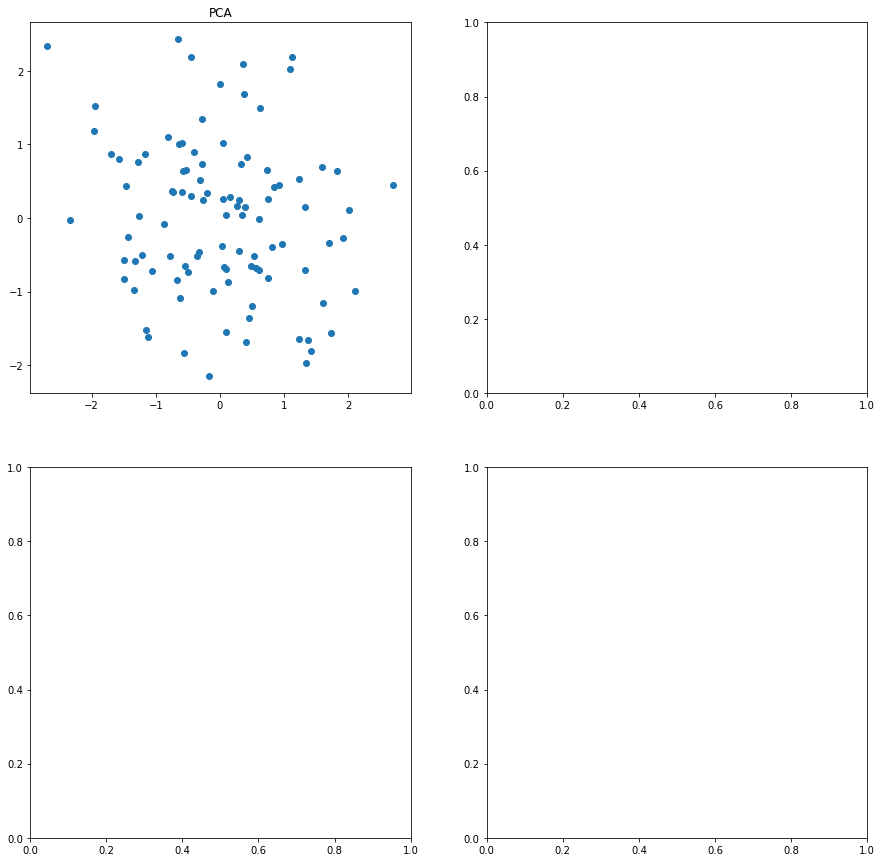

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# compare 4 different dimensionality reduction techniques
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

# create 100 random vectors
vectors = np.random.rand(100, 768)

# reduce the dimensionality of the vectors
models = [PCA(n_components=2), TSNE(n_components=2), KMeans(n_clusters=2), TruncatedSVD(n_components=2)]

# plot the results
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
for i, model in enumerate(models):
    # fix the random seed for tSNE
    if type(model).__name__ == 'TSNE':
        axes[i//2, i%2].scatter(model.fit_transform(vectors, random_state=0)[:, 0], model.fit_transform(vectors, random_state=0)[:, 1])
    else:
        axes[i//2, i%2].scatter(model.fit_transform(vectors)[:, 0], model.fit_transform(vectors)[:, 1])
    axes[i//2, i%2].set_title(type(model).__name__)